<a href="https://colab.research.google.com/github/gabrielebdz/UIS.Task6/blob/main/Task_6_Sentiment_Analysis_of_US_Airline_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -u kaleido


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [3]:
#Connect to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing libraries

%matplotlib inline
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

In [5]:
#Import the data set
tweets=pd.read_csv('/content/Tweets.csv',delimiter=',')

In [6]:
# Display the first few rows of the data
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
#Getting the number of rows and columns
print(tweets.shape)

#Getting colums names
tweets.columns

(14640, 15)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
# Check for missing data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
#unknown values
tweets.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [10]:
#Cheking for duplicates
duplicated_rows = tweets[tweets.duplicated(keep=False)]
duplicated_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
11898,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
11902,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
11905,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
11907,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,570275010759102466,negative,1.0,Lost Luggage,1.0,American,NaN,paintbranch1398,NaN,0,@AmericanAir this delayed bag was for my frien...,NaN,2015-02-24 09:32:12 -0800,NaN,NaN
12157,570273819287531520,positive,1.0,NaN,NaN,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up ...,NaN,2015-02-24 09:27:28 -0800,East Coast CT.,Central Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)


In [11]:
#delete the duplicates
tweets.drop_duplicates(inplace=True)

In [12]:
#verification if duplicates are deleted
print(tweets.shape)  # Check the shape (number of rows and columns)
print(tweets.duplicated().sum())  # Should be 0 if no duplicates are left

(14604, 15)
0


In [13]:
#CLEANING THE DATA
import re

# Select relevant columns
tweets = tweets[['text','airline', 'airline_sentiment']]

# Remove missing values
tweets = tweets.dropna()

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning
tweets['cleaned_text'] = tweets['text'].apply(clean_text)

# Display cleaned data
tweets.head()

,text,airline,airline_sentiment,cleaned_text
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral,what said
1,@VirginAmerica plus you've added commercials t...,Virgin America,positive,plus youve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,neutral,i didnt today must mean i need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,Virgin America,negative,its really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,Virgin America,negative,and its a really big bad thing about it


In [14]:
#Importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

#Download necessary NLTK Recources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#Dowload the missing 'punkt_tab' recource
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

tweets['processed_text'] = tweets['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
# Display cleaned data
tweets.head()


,text,airline,airline_sentiment,cleaned_text,processed_text
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral,what said,@ VirginAmerica What @ dhepburn said .
1,@VirginAmerica plus you've added commercials t...,Virgin America,positive,plus youve added commercials to the experienc...,@ VirginAmerica plus 've added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,neutral,i didnt today must mean i need to take anothe...,@ VirginAmerica I n't today ... Must mean I ne...
3,@VirginAmerica it's really aggressive to blast...,Virgin America,negative,its really aggressive to blast obnoxious ente...,@ VirginAmerica 's really aggressive blast obn...
4,@VirginAmerica and it's a really big bad thing...,Virgin America,negative,and its a really big bad thing about it,@ VirginAmerica 's really big bad thing


In [16]:
#checking the null values AGAIN
tweets.isnull().sum()


,0
text,0
airline,0
airline_sentiment,0
cleaned_text,0
processed_text,0


In [17]:
#Getting colums names
tweets.columns

Index(['text', 'airline', 'airline_sentiment', 'cleaned_text',
       'processed_text'],
      dtype='object')

In [18]:
#2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
#value for sentiment
value_counts = tweets['airline_sentiment'].value_counts()
print(f"Negative review: {value_counts['negative']}")
print(f"Positive review: {value_counts['positive']}")
print(f"Neutral review: {value_counts['neutral']}")
print(f"Total reviews: {value_counts.sum()}")

Negative review: 9159
Positive review: 2354
Neutral review: 3091
Total reviews: 14604


<ipython-input-20-a1dbdf82d43d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.countplot(x='airline_sentiment', data=tweets, palette=custome_palette)


Text(0, 0.5, 'Number of reviews')

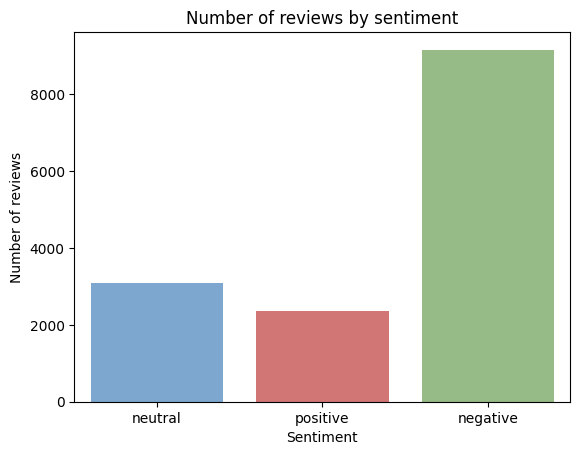

In [20]:
#bar plot
custome_palette=['#6fa8dc', '#e06666', '#93c47d']
graph=sns.countplot(x='airline_sentiment', data=tweets, palette=custome_palette)
plt.title('Number of reviews by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')

<function matplotlib.pyplot.show(close=None, block=None)>

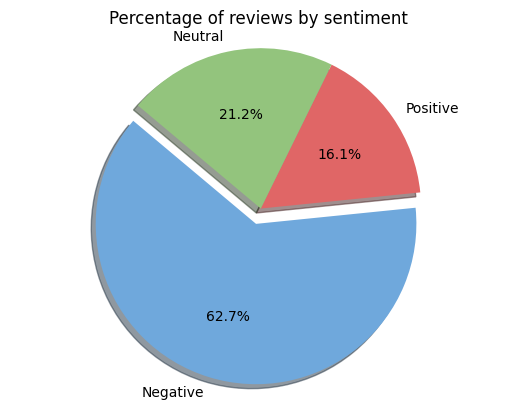

In [21]:
#pie chart
labels = ['Negative', 'Positive', 'Neutral']
sizes = [value_counts['negative'], value_counts['positive'], value_counts['neutral']]
colors = ['#6fa8dc', '#e06666', '#93c47d']
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of reviews by sentiment')
plt.show

In [22]:
#Check what kind of airlines we have in the data under airline column
unique_airlines = tweets['airline'].unique()
print(unique_airlines)

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


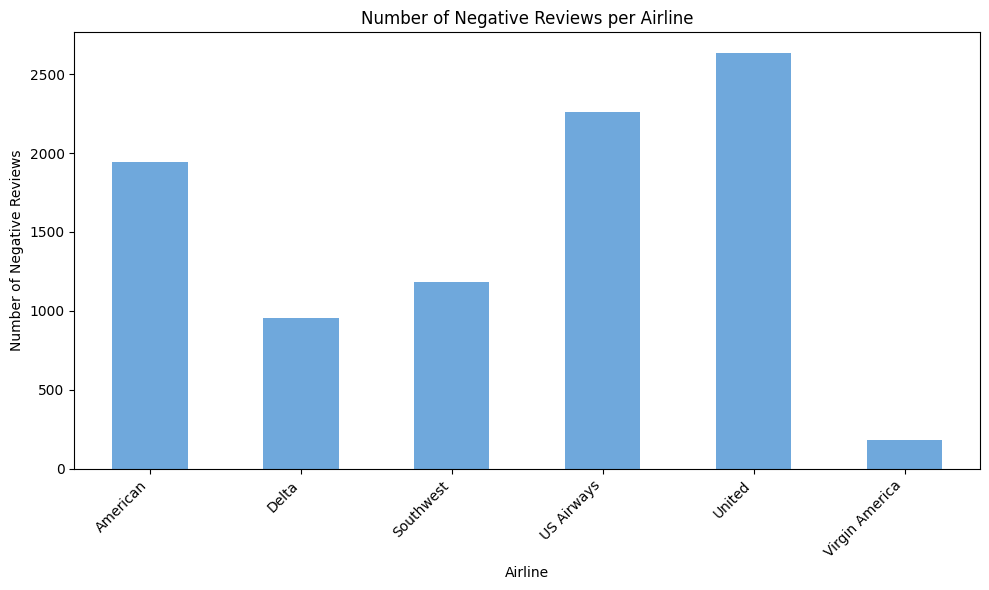

In [23]:
#NUMBER OF NEGAVITE REVIEWS PER AIRLINE
# Filter for negative reviews
negative_reviews = tweets[tweets['airline_sentiment'] == 'negative']

# Group by airline and count negative reviews
airline_negative_counts = negative_reviews.groupby('airline')['airline_sentiment'].count()

# Create the bar plot
plt.figure(figsize=(10, 6))  # figure size
airline_negative_counts.plot(kind='bar', color='#6fa8dc')  #  color
plt.title('Number of Negative Reviews per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

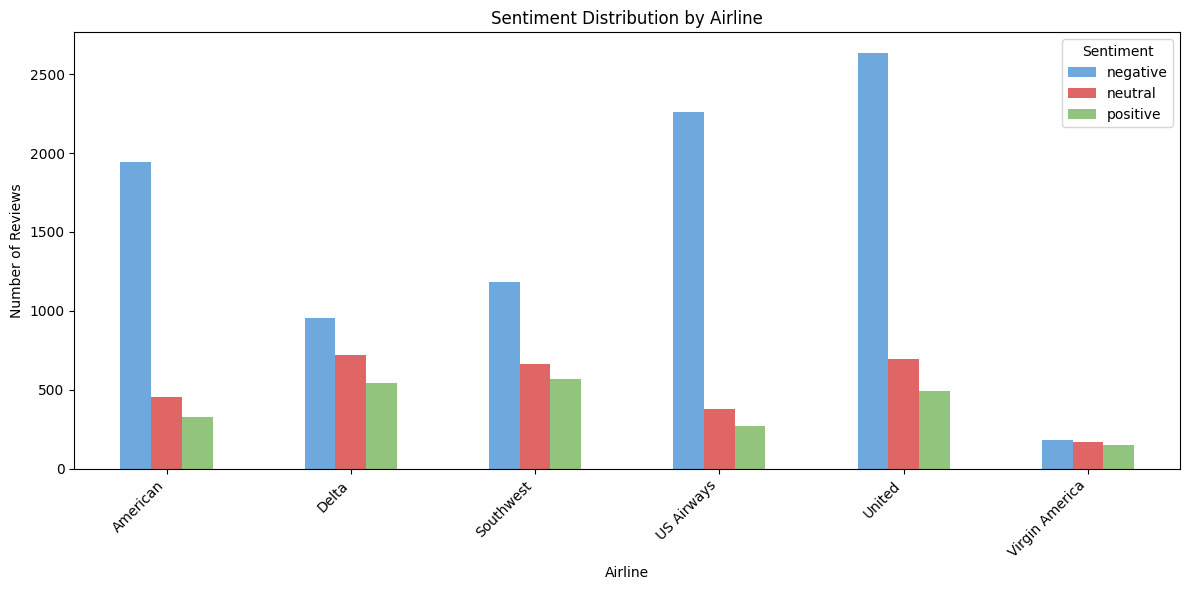

In [24]:
#SENTIMENT DISTRIBUTION BY AIRLINES
# Group data by airline and sentiment and count occurrences
airline_sentiment_counts = tweets.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()

# bar plot
airline_sentiment_counts.plot(kind='bar', figsize=(12, 6), color=['#6fa8dc', '#e06666', '#93c47d'])  # Custom colors for sentiments
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

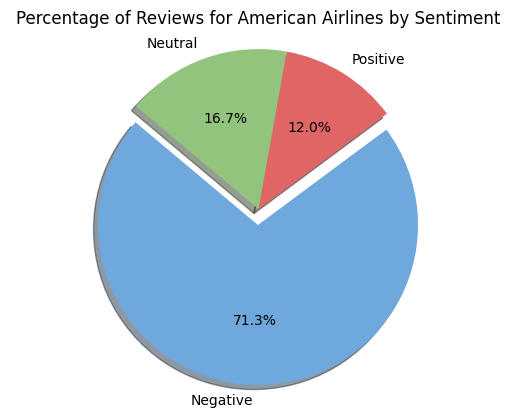

In [25]:
#pie chart for American airlines by sentiment
american_airlines = tweets[tweets['airline'] == 'American']

sentiment_counts = american_airlines['airline_sentiment'].value_counts()
total_reviews = sentiment_counts.sum()
negative_percentage = (sentiment_counts['negative'] / total_reviews) * 100
positive_percentage = (sentiment_counts['positive'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_reviews) * 100

labels = ['Negative', 'Positive', 'Neutral']
sizes = [negative_percentage, positive_percentage, neutral_percentage]
colors = ['#6fa8dc', '#e06666', '#93c47d']
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drajwn as a circle
plt.title('Percentage of Reviews for American Airlines by Sentiment')
plt.show()

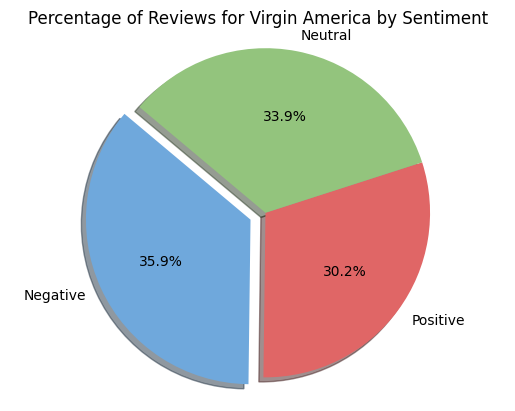

In [26]:
#pie chart for Virgin amerika by sentiment
virgin_america = tweets[tweets['airline'] == 'Virgin America']

# Filter data for Virgin America
virgin_america = tweets[tweets['airline'] == 'Virgin America']

# Calculate sentiment percentages
sentiment_counts = virgin_america['airline_sentiment'].value_counts()
total_reviews = sentiment_counts.sum()
negative_percentage = (sentiment_counts['negative'] / total_reviews) * 100
positive_percentage = (sentiment_counts['positive'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['neutral'] / total_reviews) * 100

# Create the pie chart
labels = ['Negative', 'Positive', 'Neutral']
sizes = [negative_percentage, positive_percentage, neutral_percentage]
colors = ['#6fa8dc', '#e06666', '#93c47d']
explode = (0.1, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circl
plt.title('Percentage of Reviews for Virgin America by Sentiment')
plt.show()

In [27]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# 2. Fit and transform the text data
X = vectorizer.fit_transform(tweets['processed_text'])

# 3. Get the target variable
y = tweets['airline_sentiment']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # NOT SURE IF THE SIZE IS CORRECT

#SOME INFO TO REMMEMBER
# X_train: TF-IDF features for the training set.
# X_test: TF-IDF features for the testing set.
# y_train: Sentiment labels for the training set.
# y_test: Sentiment labels for the testing set.



In [28]:
print(X_train[:5])  # Print the first 5 rows

  (0, 3640)	0.28497276380618086
  (0, 2218)	0.43661996473801223
  (0, 4587)	0.28462164230477544
  (0, 526)	0.2805613717426915
  (0, 577)	0.15629876224857805
  (0, 3165)	0.4903761760035676
  (0, 1289)	0.5509367210724982
  (1, 1929)	0.3127826248207082
  (1, 4549)	0.34145661765537383
  (1, 3129)	0.37119336480994186
  (1, 4429)	0.37204899154515125
  (1, 2550)	0.33570350201858373
  (1, 784)	0.4373555363683285
  (1, 4761)	0.41860476978785294
  (1, 4743)	0.17367435600058603
  (2, 4569)	0.2883597274790921
  (2, 2381)	0.2014909921447589
  (2, 4832)	0.2621603024716061
  (2, 1429)	0.24123505839229936
  (2, 2960)	0.4261376169832662
  (2, 4683)	0.12958893013204206
  (2, 3335)	0.3526548789859038
  (2, 559)	0.31766669495379934
  (2, 99)	0.4131152180201195
  (2, 1759)	0.3936995485480985
  (3, 617)	0.21322624930048334
  (3, 1898)	0.09928149524877276
  (3, 2122)	0.20417169607686955
  (3, 4549)	0.21655586114998504
  (3, 4903)	0.23435027189925664
  (3, 995)	0.1841831701165136
  (3, 3095)	0.199168839955912

In [29]:
#4.Model selection
#TRADITIONAL MACHINE LEARNING MODELS
# A. LOGISTIC REGRESION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.797329681615885
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1880
     neutral       0.66      0.50      0.57       582
    positive       0.82      0.59      0.69       459

    accuracy                           0.80      2921
   macro avg       0.77      0.68      0.71      2921
weighted avg       0.79      0.80      0.79      2921



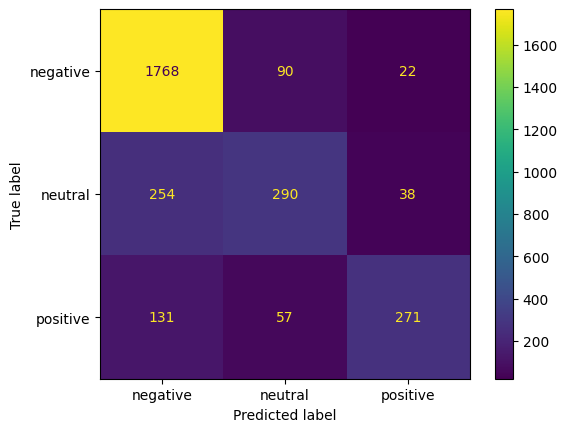

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# We have _test (true labels) and y_pred (predicted labels) from Logistic Regression model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [31]:
#class weights in model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a Logistic Regression model with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7716535433070866
              precision    recall  f1-score   support

    negative       0.91      0.80      0.85      1880
     neutral       0.55      0.69      0.61       582
    positive       0.66      0.76      0.71       459

    accuracy                           0.77      2921
   macro avg       0.70      0.75      0.72      2921
weighted avg       0.80      0.77      0.78      2921



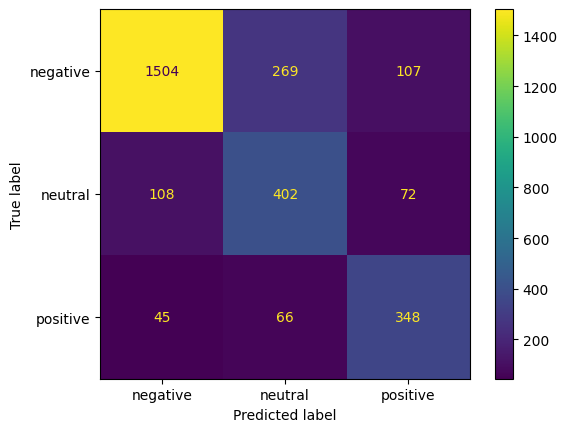

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# We have _test (true labels) and y_pred (predicted labels) from Logistic Regression model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# 3. Train the model using the resampled data
model.fit(X_train_resampled, y_train_resampled)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.781239301609038
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      1880
     neutral       0.56      0.64      0.60       582
    positive       0.70      0.72      0.71       459

    accuracy                           0.78      2921
   macro avg       0.71      0.73      0.72      2921
weighted avg       0.79      0.78      0.79      2921



In [34]:
#downsampling of the negative data points before retraining the model.
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Downsample the negative class
rus = RandomUnderSampler(random_state=42)  # Initialize RandomUnderSampler
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train) #Resample the training data

# 2. Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# 3. Train the model using the resampled data
model.fit(X_train_resampled, y_train_resampled)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7401574803149606
              precision    recall  f1-score   support

    negative       0.90      0.75      0.82      1880
     neutral       0.49      0.69      0.57       582
    positive       0.65      0.77      0.70       459

    accuracy                           0.74      2921
   macro avg       0.68      0.74      0.70      2921
weighted avg       0.78      0.74      0.75      2921



In [35]:
#B. Support Vector Machines
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a LinearSVC model
model = LinearSVC(max_iter=10000)  # You can adjust max_iter if needed

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7939061965080452
              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      1880
     neutral       0.62      0.55      0.58       582
    positive       0.75      0.65      0.69       459

    accuracy                           0.79      2921
   macro avg       0.74      0.70      0.72      2921
weighted avg       0.79      0.79      0.79      2921



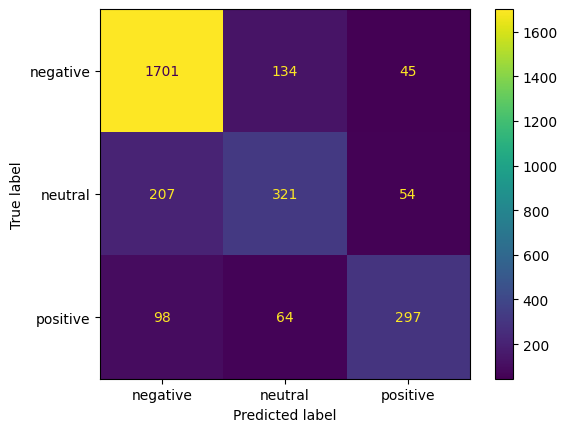

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# WE have y_test (true labels) and y_pred (predicted labels) from SVC model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [37]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Define class weights
class_weights = {'negative': 1, 'neutral': 2, 'positive': 3}  # Example weights, adjust as needed

# 2. Create a LinearSVC model with class weights
model = LinearSVC(class_weight=class_weights, max_iter=10000)  # Adjust max_iter if needed

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7778158165011982
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      1880
     neutral       0.58      0.58      0.58       582
    positive       0.68      0.68      0.68       459

    accuracy                           0.78      2921
   macro avg       0.71      0.71      0.71      2921
weighted avg       0.78      0.78      0.78      2921



In [38]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Downsample the Majority Class
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# 2. Train LinearSVC with Downsampled Data
model = LinearSVC(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# 3. Make Predictions and Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7161930845600821
              precision    recall  f1-score   support

    negative       0.90      0.73      0.80      1880
     neutral       0.46      0.64      0.54       582
    positive       0.59      0.77      0.67       459

    accuracy                           0.72      2921
   macro avg       0.65      0.71      0.67      2921
weighted avg       0.76      0.72      0.73      2921



In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train LinearSVC
model = LinearSVC(max_iter=10000)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7600136939404314
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1880
     neutral       0.53      0.60      0.57       582
    positive       0.65      0.68      0.67       459

    accuracy                           0.76      2921
   macro avg       0.69      0.70      0.69      2921
weighted avg       0.77      0.76      0.76      2921



In [40]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7695994522423828
              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      1880
     neutral       0.61      0.40      0.48       582
    positive       0.77      0.54      0.64       459

    accuracy                           0.77      2921
   macro avg       0.73      0.63      0.66      2921
weighted avg       0.76      0.77      0.75      2921



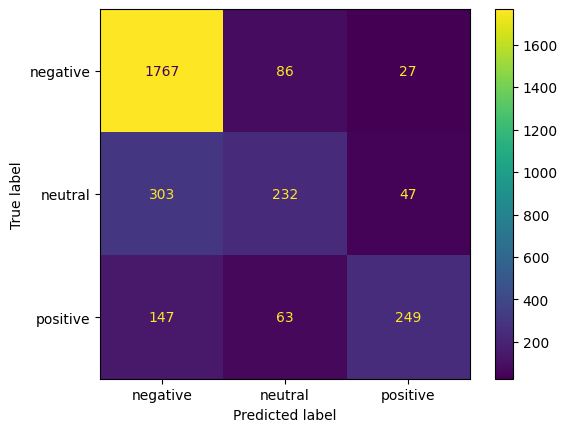

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# WE have y_test (true labels) and y_pred (predicted labels) from your Random Forest model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Downsampling with RandomUnderSampler
rus = RandomUnderSampler(random_state=42)  # Initialize RandomUnderSampler
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)  # Resample training data

# 2. Create and train the Random Forest model with downsampled data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 3. Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.717904827114002
              precision    recall  f1-score   support

    negative       0.90      0.72      0.80      1880
     neutral       0.46      0.72      0.56       582
    positive       0.63      0.70      0.66       459

    accuracy                           0.72      2921
   macro avg       0.66      0.71      0.68      2921
weighted avg       0.77      0.72      0.73      2921



In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7668606641561109
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1880
     neutral       0.56      0.52      0.54       582
    positive       0.71      0.62      0.66       459

    accuracy                           0.77      2921
   macro avg       0.70      0.67      0.69      2921
weighted avg       0.76      0.77      0.76      2921



In [44]:
## class weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

class_weights = {'negative': 1, 'neutral': 2, 'positive': 3}  # Adjust weights as needed

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7678877096884629
              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      1880
     neutral       0.60      0.43      0.50       582
    positive       0.75      0.55      0.63       459

    accuracy                           0.77      2921
   macro avg       0.72      0.64      0.67      2921
weighted avg       0.75      0.77      0.75      2921

